In [12]:
"""
基于目前的反馈，本课程相对来说不重视代码能力，而主要重视报告能力，以及目前的时间分配情况，
本作业主要代码思路均为参考他人工作完成
https://bbs.huaweicloud.com/blogs/detail/296727
1. 傅里叶变换
out = cv2.dft(src, flag)
2. 快速傅里叶变换
fft2(a, s=None, axes=(-2, -1), norm=None)
"""
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [13]:
#傅里叶变换
def fourier_transform(img):
    dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
    dftshift = np.fft.fftshift(dft)
    res1 = 20*np.log(cv2.magnitude(dftshift[:,:,0], dftshift[:,:,1]))
    return dftshift, res1

In [14]:
#傅里叶逆变换
def inverse_fourier_transform(dftshift):
    ishift = np.fft.ifftshift(dftshift)
    iimg = cv2.idft(ishift)
    res2 = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])
    return iimg, res2

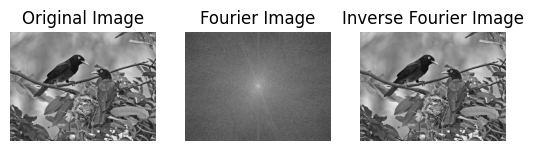

In [15]:
if __name__ == "__main__":
    #读取图像
    img = cv2.imread('OIP-C.jpg', 0)
    (dftshift, res1) = fourier_transform(img)
    (ishift, res2) = inverse_fourier_transform(dftshift)

    #展示结果
    plt.subplot(131), plt.imshow(img, 'gray'), plt.title('Original Image')
    plt.axis('off')
    plt.subplot(132), plt.imshow(res1, 'gray'), plt.title('Fourier Image')
    plt.axis('off')
    plt.subplot(133), plt.imshow(res2, 'gray'), plt.title('Inverse Fourier Image')
    plt.axis('off')
    plt.show()